# **Customer Segmentation Analysis**

# **Clustering the data and performing classification algorithms**

1. **Download** **the** **dataset**: **Dataset** 
2. **Load** **the** **dataset**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


 3.**Perform** **Below** **Visualizations**

 **Univariate** **Analysis**

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

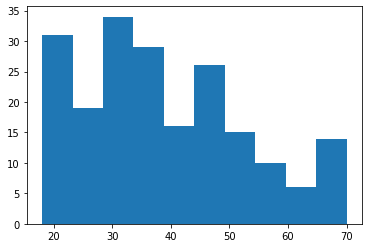

In [4]:
plt.hist(data["Age"])

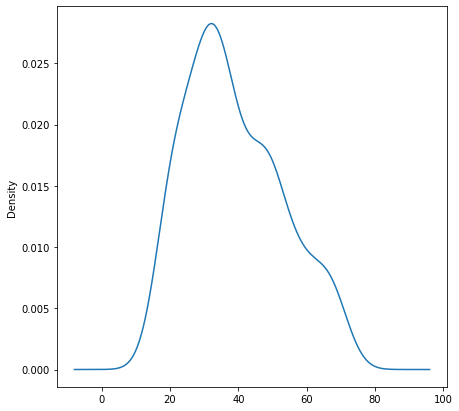

In [5]:
plt.figure(figsize=(7,7))
data["Age"].plot(kind="density")

**Bi-Variate** **Analysis**

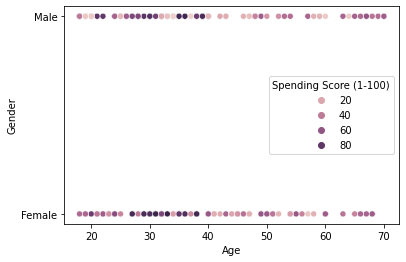

In [7]:
sns.scatterplot(x=data["Age"],y=data['Gender'],hue=data["Spending Score (1-100)"])

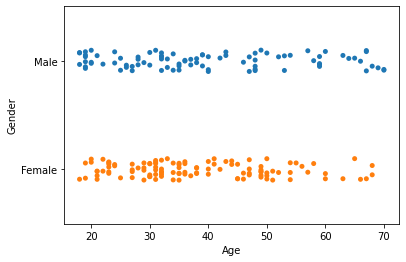

In [8]:
sns.stripplot(x=data["Age"],y=data["Gender"])

**Multi-Variate Analysis**

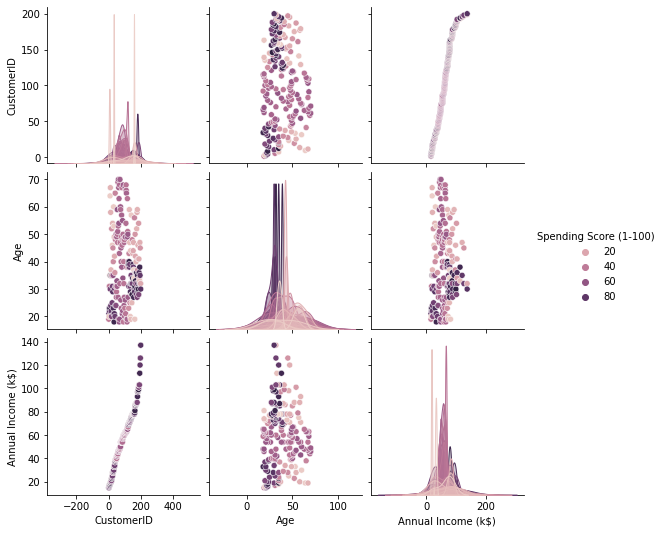

In [9]:
sns.pairplot(data,hue='Spending Score (1-100)')

4. **Perform** **descriptive** **statistics** **on** **the** **dataset**

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5 .**Handle the Missing values**

In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

 6.**Find** **the** **outliers** **and** **replace** **the** **outliers**

In [12]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.00,39.0
1,2.0,Male,21.0,15.00,81.0
2,3.0,Female,20.0,16.00,6.0
3,4.0,Female,23.0,16.00,77.0
4,5.0,Female,31.0,17.00,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.00,79.0
196,197.0,Female,45.0,126.00,28.0
197,198.0,Male,32.0,126.00,74.0
198,199.0,Male,32.0,132.75,18.0


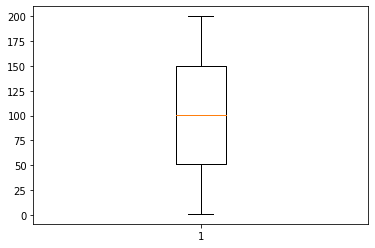

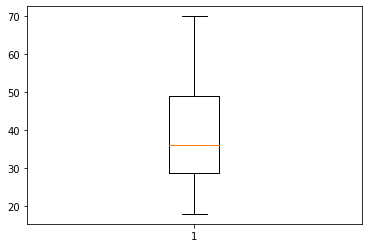

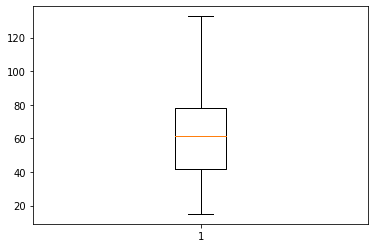

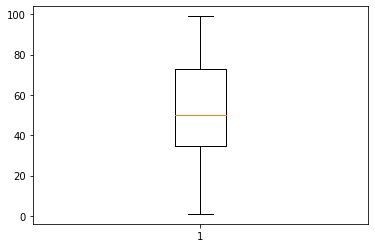

In [13]:
for i in data:
    if data[i].dtype=='int64' or data[i].dtypes=='float64':
        plt.boxplot(data[i])
        plt.show()

 7.**Check** **for** **Categorical** **columns** **and** **perform** **encoding**

In [47]:
x = data.iloc[:,0:-1]
x = pd.get_dummies(x)
x.head()

,CustomerID,Age,Annual Income (k$),Gender_Female,Gender_Male
0,1.0,19.0,15.0,0,1
1,2.0,21.0,15.0,0,1
2,3.0,20.0,16.0,1,0
3,4.0,23.0,16.0,1,0
4,5.0,31.0,17.0,1,0


**8**. **Scaling** **the** **data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

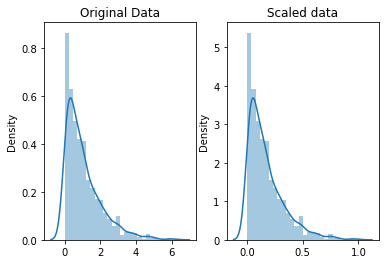

In [22]:
from mlxtend.preprocessing import minmax_scaling
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

**9. Perform any of the clustering algorithms**

**Clustering using K- means**

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = data.iloc[:, -3:]
km = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


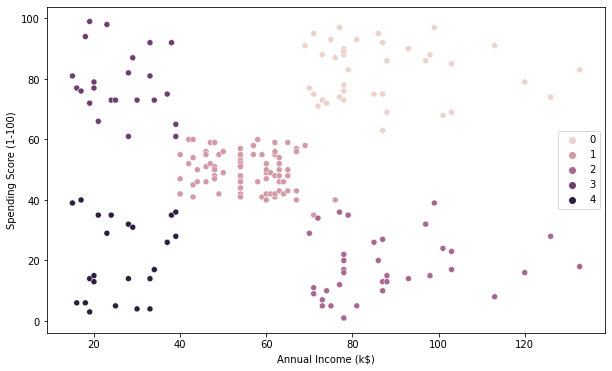

In [24]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 1], X.iloc[:, 2], hue=km.labels_)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


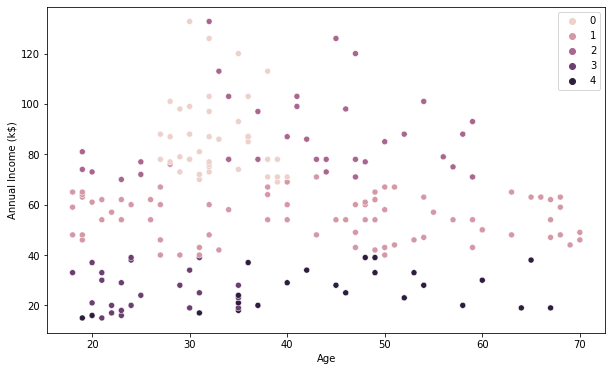

In [25]:
# K-Means visualization on another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=km.labels_)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


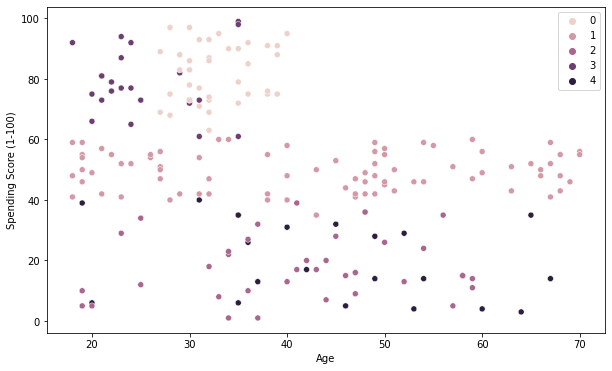

In [26]:
# K-Means visualization on the last pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 2], hue=km.labels_)
plt.show()

**10. Add the cluster data with the primary dataset**

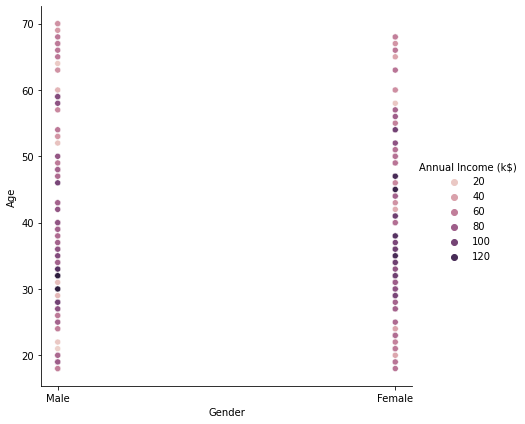

In [33]:
from sklearn.cluster import KMeans
S = data.loc[:, ["Age", "Gender", "Annual Income (k$)"]]
k = KMeans(n_clusters=6)

sns.relplot(x="Gender", y="Age", hue="Annual Income (k$)", data=S, height=6,);

11.**Split** **the** **data** **into** **dependent** **and** **independent** **variables**

In [15]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)


(200, 4)
(200,)


 12.**Split** **the** **data** **into** **training** **and** **testing**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (150, 4)
 y_train.shape :  (150,)
 x_test.shape :  (50, 4)
 y_test.shape :  (50,)


**13. Build the Model**

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**14. Train the Model**

In [48]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4
0,-0.496838,0.591319,-0.448576,0.862662,-0.862662
1,0.426459,-1.100849,0.345922,0.862662,-0.862662
2,1.471700,0.168277,1.443085,0.862662,-0.862662
3,-0.043900,-0.818821,-0.032410,0.862662,-0.862662
4,0.861976,-0.325272,0.648587,-1.159202,1.159202


In [49]:
model.fit(x_train, y_train)

LinearRegression()

**15. Test the Model**

In [50]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

**16. Measure the performance using Evaluation Metrics.**

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :582.294290
Mean Squared error of testing set :628.112950
